In [1]:
import sys

import numpy  as np
import pandas as pd
import gc
import pprint
import hashlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [3]:
from sklearn.datasets import make_classification

# arvore de decisao

In [47]:
data = make_classification(n_samples     = 100, 
                            n_features    = 5, 
                            n_informative = 2, 
                            n_classes     = 2,
                            flip_y        = 0.1,
                            class_sep     = 10)

df      = pd.DataFrame( data[0], columns = [ 'x{}'.format(str(i)) for i in range(len(data[0][1])) ] )
df['y'] = data[1]

df.head()

,x0,x1,x2,x3,x4,y
0,3.552394,10.645279,0.386854,10.568290,-9.748200,1
1,-12.755087,-9.391289,1.370430,9.244821,-1.762775,0
2,2.994473,9.537027,-1.105727,9.831056,-8.935927,1
3,-3.721601,-10.979104,-1.175720,-10.788136,9.991630,0
4,-3.407665,-10.372945,-1.907504,-10.401851,9.556815,0


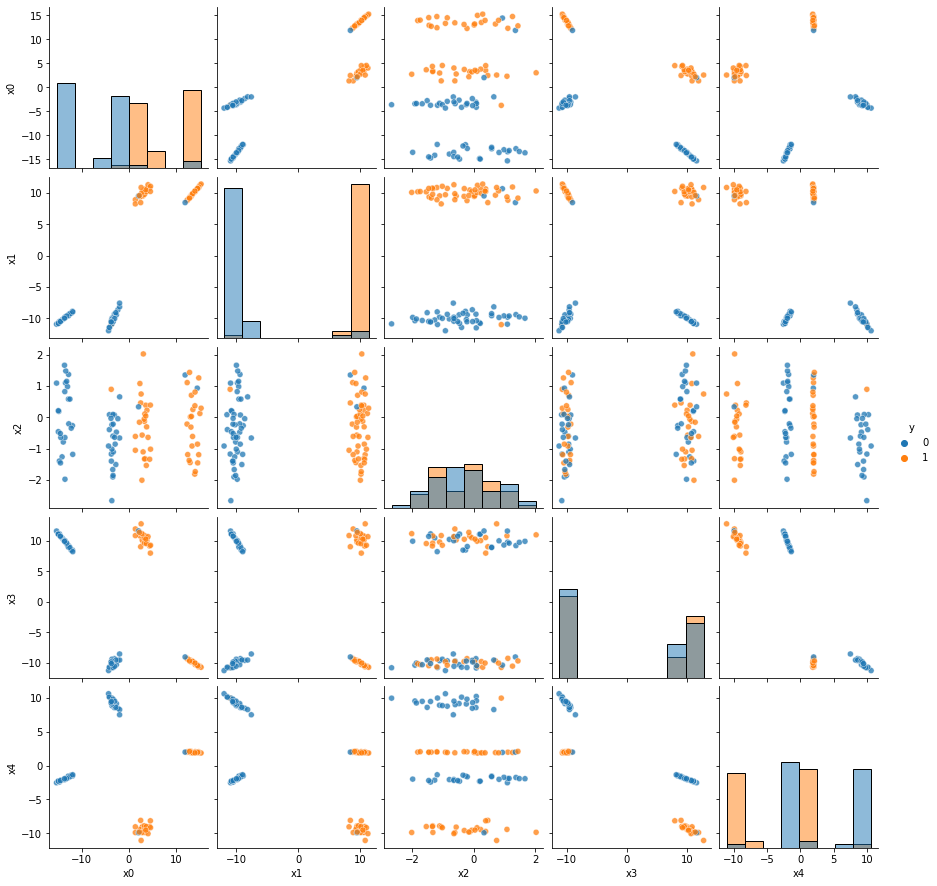

In [48]:
sns.pairplot(df, plot_kws={'alpha':0.75}, hue='y', diag_kind="hist");

In [53]:
clf = DecisionTreeClassifier(max_depth=3)
model = clf.fit(data[0], data[1])

In [54]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.34
|   |--- feature_1 <= -10.99
|   |   |--- feature_1 <= -11.22
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -11.22
|   |   |   |--- class: 1
|   |--- feature_1 >  -10.99
|   |   |--- class: 0
|--- feature_1 >  0.34
|   |--- feature_2 <= 0.31
|   |   |--- class: 1
|   |--- feature_2 >  0.31
|   |   |--- feature_2 <= 0.35
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.35
|   |   |   |--- class: 1



In [55]:
text_representation = tree.export_text(clf, feature_names=df.iloc[:,:-1].columns.tolist())
print(text_representation)

|--- x1 <= 0.34
|   |--- x1 <= -10.99
|   |   |--- x1 <= -11.22
|   |   |   |--- class: 0
|   |   |--- x1 >  -11.22
|   |   |   |--- class: 1
|   |--- x1 >  -10.99
|   |   |--- class: 0
|--- x1 >  0.34
|   |--- x2 <= 0.31
|   |   |--- class: 1
|   |--- x2 >  0.31
|   |   |--- x2 <= 0.35
|   |   |   |--- class: 0
|   |   |--- x2 >  0.35
|   |   |   |--- class: 1



# ordinal label encoding

In [61]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )
df['pos'].value_counts()

MEI    5017
ATA    3143
ZAG    2795
LAT    2625
TEC    1438
GOL    1386
Name: pos, dtype: int64

vamos supor que atacante vale mais que meia que vale mais que lateral que vale mais que zagueiro que vale mais que goleiro que vale mais que técnico

In [65]:
map_ = {"ATA":6, "MEI":5, "LAT":4, "ZAG":3, "GOL":2, "TEC":1}
inv_map_ = {v: k for k, v in map_.items()}

df["pos_ord_lab_enc"] = df["pos"].map(map_)

df[["pos", "pos_ord_lab_enc"]]

,pos,pos_ord_lab_enc
0,ATA,6
1,LAT,4
2,ATA,6
3,ZAG,3
4,MEI,5
...,...,...
16399,LAT,4
16400,ZAG,3
16401,ATA,6
16402,MEI,5


In [66]:
map_

{'ATA': 6, 'MEI': 5, 'LAT': 4, 'ZAG': 3, 'GOL': 2, 'TEC': 1}

In [67]:
inv_map_

{6: 'ATA', 5: 'MEI', 4: 'LAT', 3: 'ZAG', 2: 'GOL', 1: 'TEC'}

.